In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\raysu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import pandas as pd

path = "../data/"

application_train = pd.read_csv(path + "application_train.csv")
application_test = pd.read_csv(path + "application_test.csv")
bureau = pd.read_csv(path + "bureau.csv")
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
previous_application = pd.read_csv(path + "previous_application.csv")
pos_cash = pd.read_csv(path + "POS_CASH_balance.csv")
installments = pd.read_csv(path + "installments_payments.csv")
credit_card = pd.read_csv(path + "credit_card_balance.csv")

In [4]:
application_train['TARGET'].value_counts(normalize=True)
#~92% - Repaid
#~8% - Default

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

C:\Users\raysu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


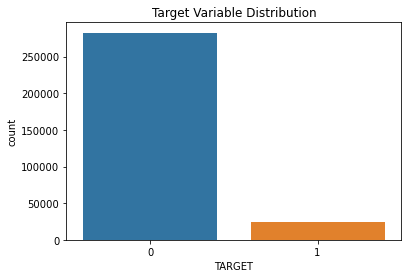

In [5]:
# Plot Target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=application_train, x='TARGET')
plt.title("Target Variable Distribution")
plt.show()

In [6]:
# Rank features by missing values
missing = application_train.isna().mean().sort_values(ascending=False)
missing.head(20)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
LANDAREA_AVG                0.593767
dtype: float64

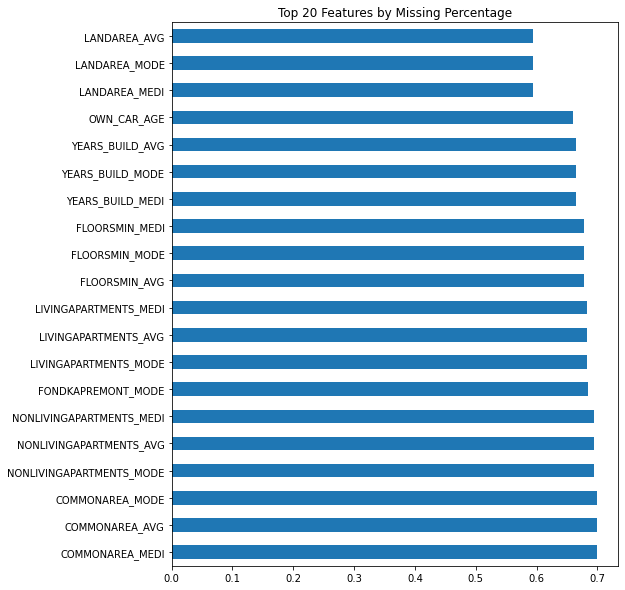

In [7]:
# Plot missing values
missing.head(20).plot(kind='barh', figsize=(8,10))
plt.title("Top 20 Features by Missing Percentage")
plt.show()
# We will ignore these features

In [9]:
num_cols = application_train.select_dtypes(include=['int64', 'float64']).columns
# We only want the numerical values

In [72]:
application_train[num_cols].describe().T.head(20)
# `dataframe.T.head(10) - The .T. transposes the index and columns (Now columns are on index)
# Strange outlier in DAYS_EMPLOYED, 3.65243e+05 is 1000 years of employment

# Talk about:
## DAYS_BIRTH - Applicant's age
## AMT_CREDIT - Credit amount of loan
## DAYS_EMPLOYED - Days Employed, negative since we count backwards from 
##                 when applicant applied for loan
## AMT_INCOME_TOTAL - Client's total income
## AMT_ANNUITY - Loan Annuity (amount to be paid each year)
## 

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


---

### DAYS_BIRTH Analysis

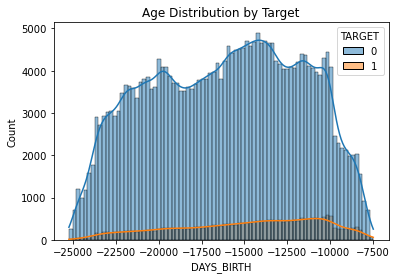

In [13]:
# Plot age distribution
sns.histplot(data=application_train, x="DAYS_BIRTH", hue='TARGET', kde=True)
plt.title("Age Distribution by Target")
plt.show()
# Younger applicants default more

---

### AMT_CREDIT Analysis

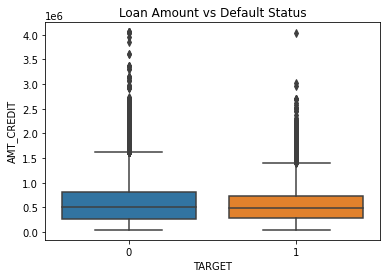

In [19]:
# Risk analysis depending on loan amount
sns.boxplot(data=application_train, x='TARGET', y='AMT_CREDIT')
plt.title("Loan Amount vs Default Status")
plt.show()
# Larger loan -> larger risk of default

---

### DAYS_EMPLOYED Analysis

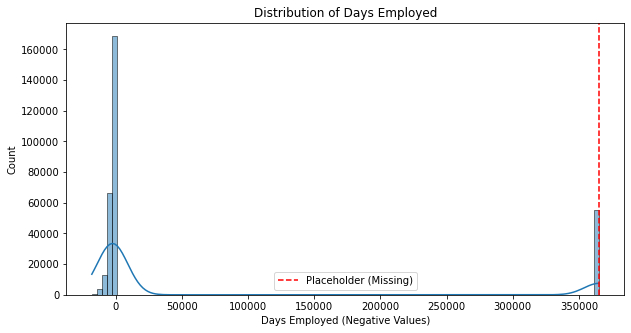

In [27]:
# Showcasing invalid 365,243 days of employment (roughly 1000 years)
plt.figure(figsize=(10,5))
sns.histplot(application_train['DAYS_EMPLOYED'], bins=100, kde=True)
plt.axvline(365243, color='red', linestyle='--', label='Placeholder (Missing)')
plt.title("Distribution of Days Employed")
plt.xlabel("Days Employed (Negative Values)")
plt.legend()
plt.show()

In [36]:
# Cleaning invalid placeholder values
tmp = application_train.copy()
tmp.loc[tmp['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = None

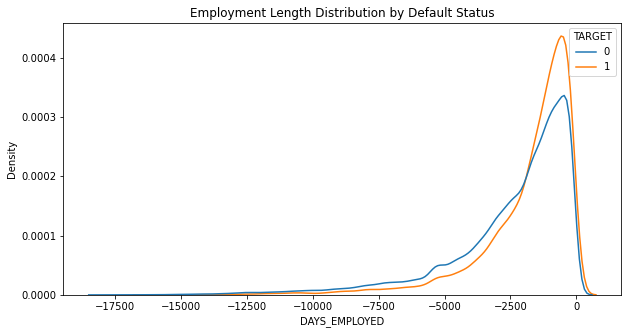

In [42]:
# KDE Distribution plot after invalid placeholder removal
plt.figure(figsize=(10,5))
sns.kdeplot(data=tmp, x='DAYS_EMPLOYED', hue='TARGET', common_norm=False)
plt.title("Employment Length Distribution by Default Status")
plt.show()
# More repaid the longer employed an applicant is

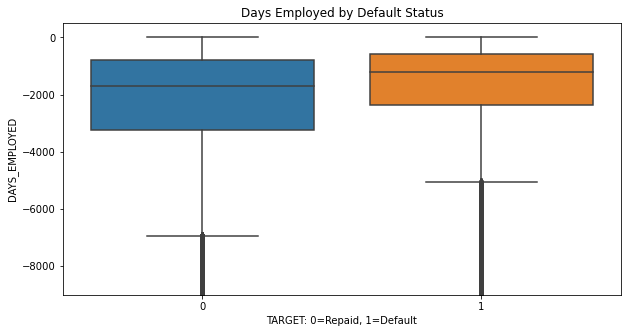

In [60]:
# DAYS_EMPLOYED and TARGET Correlation check
plt.figure(figsize=(10,5))
sns.boxplot(data=tmp, x='TARGET', y='DAYS_EMPLOYED')
plt.ylim([-9000, 500])
plt.title("Days Employed by Default Status")
plt.xlabel("TARGET: 0=Repaid, 1=Default")
plt.show()
# Larger negative days = longer days of employment
# Lower days of employment -> Larger risk of default

---

### AMT_INCOME_TOTAL Analysis

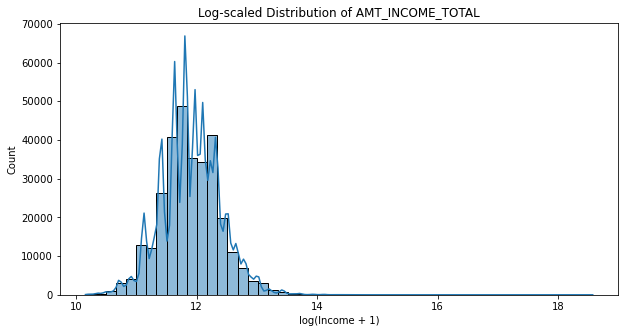

In [64]:
# We find AMT_INCOME_TOTAL is very skewed, so we log-scale for meaningful distribution
import numpy as np

plt.figure(figsize=(10,5))
sns.histplot(np.log1p(application_train['AMT_INCOME_TOTAL']), bins=50, kde=True)
plt.title("Log-scaled Distribution of AMT_INCOME_TOTAL")
plt.xlabel("log(Income + 1)")
plt.show()
# Large cluster of mid-income earners
# Can see large outliers, Income data is very skewed

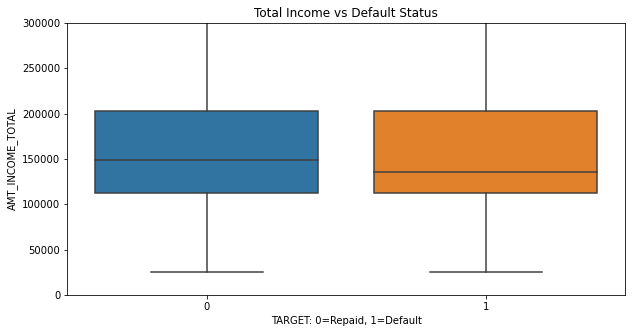

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(data=application_train, x='TARGET', y='AMT_INCOME_TOTAL')
plt.ylim([0,300000]) # Limit to remove outlier
plt.title("Total Income vs Default Status")
plt.xlabel("TARGET: 0=Repaid, 1=Default")
plt.show()
# Large outlier in Target=1, very skewed
# With limit: Lower income more at risk of default

---

### AMT_ANNUITY Analysis

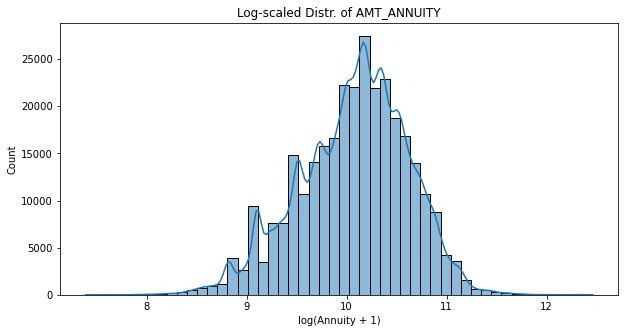

In [76]:
# Log-scaled histogram for ease of interpretation
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(application_train['AMT_ANNUITY']), bins=50, kde=True)
plt.title("Log-scaled Distr. of AMT_ANNUITY")
plt.xlabel("log(Annuity + 1)")
plt.show()
# Outliers are present -> opt to set y-limits

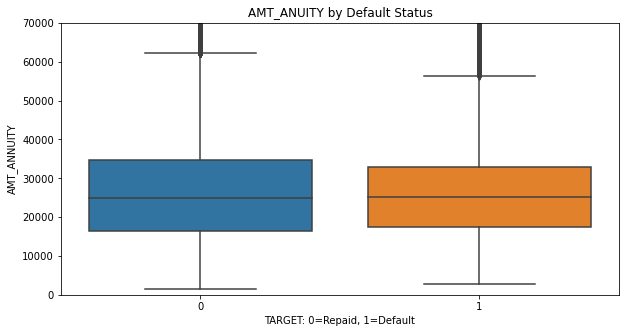

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(data=application_train, x='TARGET', y='AMT_ANNUITY')
plt.ylim([0,70000])
plt.title("AMT_ANUITY by Default Status")
plt.xlabel("TARGET: 0=Repaid, 1=Default")
plt.show()
# Hard to tell any correlation between annuity and target

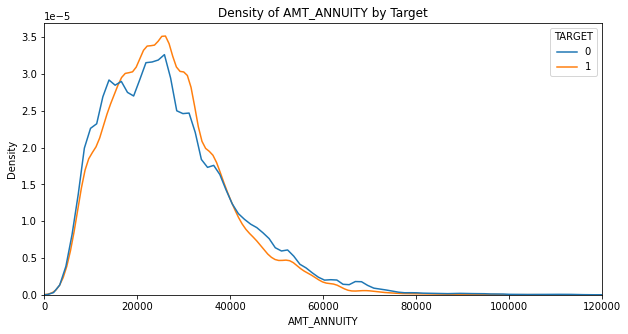

In [83]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=application_train, x='AMT_ANNUITY', hue='TARGET', common_norm=False)
plt.xlim([0,120000])
plt.title("Density of AMT_ANNUITY by Target")
plt.show()
# The higher the annuity, the greater the risk of default.
# Going even higher has lower default rates however, though such low density.

---

### EXT_SOURCE Analysis

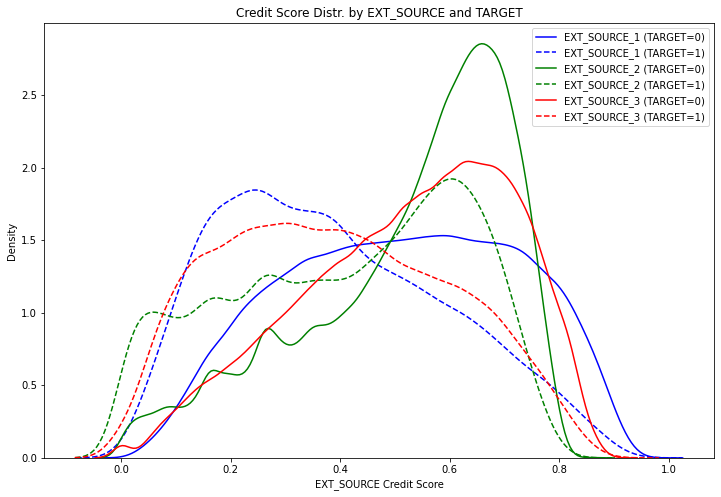

In [12]:
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
colors =['blue', 'green', 'red']

plt.figure(figsize=(12,8))
for col, c in zip(ext_sources, colors):
    sns.kdeplot(
    data=application_train[application_train['TARGET'] == 0],
        x=col,
        label=f"{col} (TARGET=0)",
        linestyle="-",
        color=c
    )
    sns.kdeplot(
    data=application_train[application_train['TARGET'] == 1],
        x=col,
        label=f"{col} (TARGET=1)",
        linestyle="--",
        color=c
    )
    
plt.xlabel("EXT_SOURCE Credit Score")
plt.title("Credit Score Distr. by EXT_SOURCE and TARGET")
plt.legend()
plt.show()
# Higher Credit Score -> Lower risk of default
# Defaults cluster at lower EXT_SOURCE scores

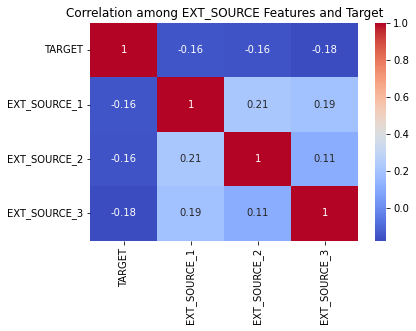

In [13]:
# Correlation Heatmap
ext_source_df = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2' ,'EXT_SOURCE_3']]

plt.figure(figsize=(6,4))
sns.heatmap(ext_source_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation among EXT_SOURCE Features and Target")
plt.show()

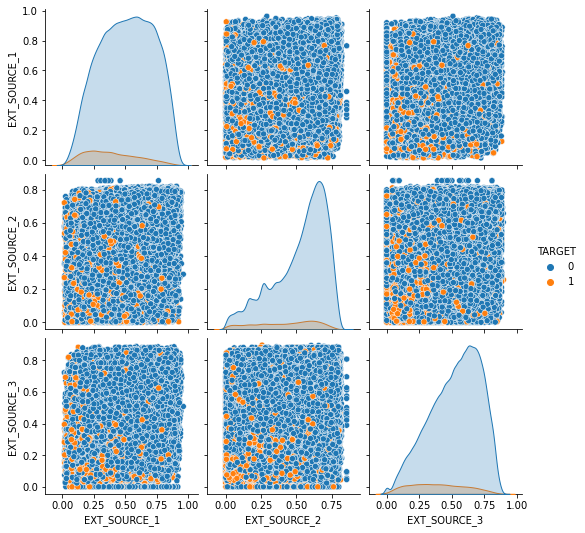

In [14]:
# Let's see how different EXT_SOURCE interact with one another
sns.pairplot(application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']], hue='TARGET')
plt.show()

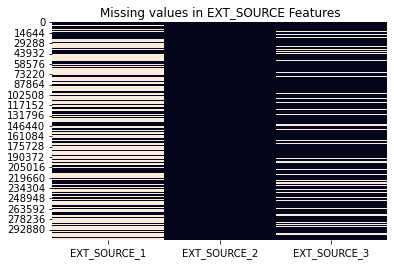

In [15]:
# Wondering if there are missing values in EXT_SOURCE
sns.heatmap(application_train[ext_sources].isna(), cbar=False)
plt.title("Missing values in EXT_SOURCE Features")
plt.show()
# EXT_SOURCE_1 has a lot of missing values, EXT_SOURCE_3 also has some but not as
# much. Whilst EXT_SOURCE_2 has practically no missing values.